In [15]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade "numexpr>=2.8.4" "bottleneck>=1.3.6" "scipy>=1.10" "numpy<2.0"

  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.7.3
    Uninstalling numexpr-2.7.3:
      Successfully uninstalled numexpr-2.7.3
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.2
    Uninstalling Bottleneck-1.3.2:
      Successfully uninstalled Bottleneck-1.3.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Run this cell to fix the library version
!pip install "numpy<2.0"

In [27]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("C:/Users/PALAK/Desktop/Project/E-commerce Customer Behavior - Sheet1.csv")
print(df)

     Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold      1120.20   
1            102    Male   34    Los Angeles          Silver       780.50   
2            103  Female   43        Chicago          Bronze       510.75   
3            104    Male   30  San Francisco            Gold      1480.30   
4            105    Male   27          Miami          Silver       720.40   
..           ...     ...  ...            ...             ...          ...   
345          446    Male   32          Miami          Silver       660.30   
346          447  Female   36        Houston          Bronze       470.50   
347          448  Female   30       New York            Gold      1190.80   
348          449    Male   34    Los Angeles          Silver       780.20   
349          450  Female   43        Chicago          Bronze       515.75   

     Items Purchased  Average Rating  Discount Applied  \
0                

In [29]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [31]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [32]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df.dropna(inplace=True)
print (df)

     Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold      1120.20   
1            102    Male   34    Los Angeles          Silver       780.50   
2            103  Female   43        Chicago          Bronze       510.75   
3            104    Male   30  San Francisco            Gold      1480.30   
4            105    Male   27          Miami          Silver       720.40   
..           ...     ...  ...            ...             ...          ...   
345          446    Male   32          Miami          Silver       660.30   
346          447  Female   36        Houston          Bronze       470.50   
347          448  Female   30       New York            Gold      1190.80   
348          449    Male   34    Los Angeles          Silver       780.20   
349          450  Female   43        Chicago          Bronze       515.75   

     Items Purchased  Average Rating  Discount Applied  \
0                

In [35]:
new_df=df[['Customer ID', 'Days Since Last Purchase', 'Items Purchased', 'Total Spend']].copy()
new_df.rename(columns={'Days Since Last Purchase':'Recency','Items Purchased':'Frequency','Total Spend':'Monetary'},inplace=True)
print(new_df)

     Customer ID  Recency  Frequency  Monetary
0            101       25         14   1120.20
1            102       18         11    780.50
2            103       42          9    510.75
3            104       12         19   1480.30
4            105       55         13    720.40
..           ...      ...        ...       ...
345          446       42         10    660.30
346          447       27          8    470.50
347          448       28         16   1190.80
348          449       21         11    780.20
349          450       49         10    515.75

[348 rows x 4 columns]


In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [37]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42,n_init=10)
    kmeans.fit(scaled_rfm_df)
    inertia.append(kmeans.inertia_)



In [38]:
inertia 

[1044.0,
 425.28489958334745,
 237.71668563252177,
 150.9844709499077,
 85.88977168007288,
 39.87425749375515,
 32.30145192401561,
 27.390749606760593,
 23.84217811290922,
 20.864739244658292]

In [39]:
from sklearn.preprocessing import StandardScaler
rfm_df = new_df[['Recency', 'Frequency', 'Monetary']]
scaler=StandardScaler()
scaled_rfm = scaler.fit_transform(rfm_df)
scaled_rfm_df = pd.DataFrame(scaled_rfm, columns=['Recency', 'Frequency', 'Monetary'])
print("Original RFM Data:\n")
print(rfm_df.head())
print("\nScaled RFM Data:")
print(scaled_rfm_df.head())

Original RFM Data:

   Recency  Frequency  Monetary
0       25         14   1120.20
1       18         11    780.50
2       42          9    510.75
3       12         19   1480.30
4       55         13    720.40

Scaled RFM Data:
    Recency  Frequency  Monetary
0 -0.120022   0.330381  0.754230
1 -0.640260  -0.394236 -0.186319
2  1.143413  -0.877314 -0.933192
3 -1.086179   1.538076  1.751261
4  2.109570   0.088842 -0.352721


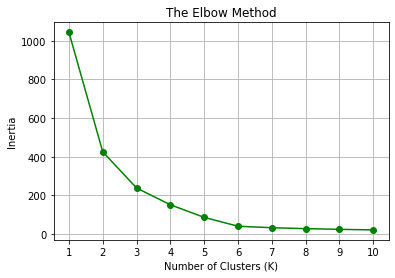

In [40]:
plt.plot(k_range, inertia, linestyle='-',marker='o',color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [41]:
optimal_k = 3
final_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
final_kmeans.fit(scaled_rfm_df)
cluster_labels = final_kmeans.labels_
new_df['Cluster'] = cluster_labels
print("Dataframe with Cluster labels added:")
print(new_df)

Dataframe with Cluster labels added:
     Customer ID  Recency  Frequency  Monetary  Cluster
0            101       25         14   1120.20        1
1            102       18         11    780.50        1
2            103       42          9    510.75        0
3            104       12         19   1480.30        2
4            105       55         13    720.40        0
..           ...      ...        ...       ...      ...
345          446       42         10    660.30        0
346          447       27          8    470.50        0
347          448       28         16   1190.80        1
348          449       21         11    780.20        1
349          450       49         10    515.75        0

[348 rows x 5 columns]


In [42]:
cluster_profile = new_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'No of Customers'})

print(cluster_profile)

           Recency  Frequency     Monetary  No of Customers
Cluster                                                    
0        36.406977   9.569767   547.116860              172
1        19.932203  13.474576   985.263559              118
2        11.172414  20.000000  1459.772414               58


In [43]:
profile_df = pd.merge(new_df, df[['Customer ID', 'Age', 'Gender', 'City', 'Membership Type']], on='Customer ID', how='left')
print(profile_df)

     Customer ID  Recency  Frequency  Monetary  Cluster  Age  Gender  \
0            101       25         14   1120.20        1   29  Female   
1            102       18         11    780.50        1   34    Male   
2            103       42          9    510.75        0   43  Female   
3            104       12         19   1480.30        2   30    Male   
4            105       55         13    720.40        0   27    Male   
..           ...      ...        ...       ...      ...  ...     ...   
343          446       42         10    660.30        0   32    Male   
344          447       27          8    470.50        0   36  Female   
345          448       28         16   1190.80        1   30  Female   
346          449       21         11    780.20        1   34    Male   
347          450       49         10    515.75        0   43  Female   

              City Membership Type  
0         New York            Gold  
1      Los Angeles          Silver  
2          Chicago      

In [44]:
demographic_profile = profile_df.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: x.value_counts().index[0],
    'City': lambda x: x.value_counts().index[0],    
    'Membership Type': lambda x: x.value_counts().index[0] 
})

print(demographic_profile)

               Age  Gender           City Membership Type
Cluster                                                  
0        35.877907  Female        Chicago          Bronze
1        32.415254    Male       New York            Gold
2        29.120690    Male  San Francisco            Gold


In [45]:
profile_df = pd.merge(new_df, df[['Customer ID', 'Age', 'Gender', 'City', 'Membership Type']], on='Customer ID')
print(profile_df.head())

   Customer ID  Recency  Frequency  Monetary  Cluster  Age  Gender  \
0          101       25         14   1120.20        1   29  Female   
1          102       18         11    780.50        1   34    Male   
2          103       42          9    510.75        0   43  Female   
3          104       12         19   1480.30        2   30    Male   
4          105       55         13    720.40        0   27    Male   

            City Membership Type  
0       New York            Gold  
1    Los Angeles          Silver  
2        Chicago          Bronze  
3  San Francisco            Gold  
4          Miami          Silver  


In [46]:
demographic_profile = profile_df.groupby('Cluster').agg({
    'Age': 'mean',
    'Frequency':'count',
    'Recency':'mean',
    'Gender': lambda x: x.value_counts().index[0],  # This is the most common gender
    'City': lambda x: x.value_counts().index[0],    # This is the most common city
    'Membership Type': lambda x: x.value_counts().index[0] # This is the most common membership
})

print(demographic_profile)

               Age  Frequency    Recency  Gender           City  \
Cluster                                                           
0        35.877907        172  36.406977  Female        Chicago   
1        32.415254        118  19.932203    Male       New York   
2        29.120690         58  11.172414    Male  San Francisco   

        Membership Type  
Cluster                  
0                Bronze  
1                  Gold  
2                  Gold  


In [47]:
profile_df.to_csv("C:/Users/PALAK/Desktop/Project/Ecom.csv")

In [48]:
cluster_map = {
    0: "Top-Tier Customers",
    1: "Promising Newcomers",
    2: "High-Value Sleepers"
}

profile_df['Persona'] = profile_df['Cluster'].map(cluster_map)
print(profile_df.head())
profile_df.to_csv("C:/Users/PALAK/Desktop/Project/E.csv", index=False)
print("Data exported with new 'Persona' column!")

   Customer ID  Recency  Frequency  Monetary  Cluster  Age  Gender  \
0          101       25         14   1120.20        1   29  Female   
1          102       18         11    780.50        1   34    Male   
2          103       42          9    510.75        0   43  Female   
3          104       12         19   1480.30        2   30    Male   
4          105       55         13    720.40        0   27    Male   

            City Membership Type              Persona  
0       New York            Gold  Promising Newcomers  
1    Los Angeles          Silver  Promising Newcomers  
2        Chicago          Bronze   Top-Tier Customers  
3  San Francisco            Gold  High-Value Sleepers  
4          Miami          Silver   Top-Tier Customers  
Data exported with new 'Persona' column!


In [50]:
df =pd.read_csv("C:/Users/PALAK/Desktop/Project/E-commerce Customer Behavior - Sheet1.csv")
df.dropna(inplace=True)
new_df = df[['Customer ID', 'Days Since Last Purchase', 
             'Items Purchased', 'Total Spend']].copy()
new_df.rename(columns={'Days Since Last Purchase':'Recency', 
                       'Items Purchased':'Frequency', 
                       'Total Spend':'Monetary'}, inplace=True)
scaler = StandardScaler()
rfm_df = new_df[['Recency', 'Frequency', 'Monetary']]
scaled_rfm = scaler.fit_transform(rfm_df)